# Training Classifiers for ESG Ratings

In [1]:
from ekorpkit import eKonf

if eKonf.is_colab():
    eKonf.mount_google_drive()
ws = eKonf.set_workspace(
    workspace="/workspace", 
    project="ekorpkit-book/exmaples", 
    task="esg", 
    log_level="INFO"
)
print("version:", ws.version)
print("project_dir:", ws.project_dir)

INFO:ekorpkit.base:Set environment variable EKORPKIT_DATA_ROOT=/workspace/data
INFO:ekorpkit.base:Set environment variable CACHED_PATH_CACHE_ROOT=/workspace/.cache/cached_path


version: 0.1.40.post0.dev57
project_dir: /workspace/projects/ekorpkit-book/exmaples
time: 930 ms (started: 2022-12-16 02:21:24 +00:00)


## Preparing `esg_polarity_kr` dataset

In [2]:
from ekorpkit.datasets.dataset import Dataset

ds_cfg = eKonf.compose("dataset=dataset")
ds_cfg.name = 'esg_polarity_kr'
ds_cfg.data_dir = ds_cfg.path.data_dir
ds = Dataset(**ds_cfg)

INFO:ekorpkit.datasets.config:Loaded info file: /workspace/projects/ekorpkit-book/exmaples/esg/inputs/esg_polarity_kr/info-esg_polarity_kr.yaml
INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'split'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.info.column:Added a column [split] with value [test]
INFO:ekorpkit.info.column:Added a column [split] with value [dev]


time: 1.83 s (started: 2022-12-16 02:21:25 +00:00)


In [3]:
ds.INFO

{'splits': {'train': {'data_file': 'esg_polarity_kr-train.parquet',
   'name': 'train',
   'num_examples': 8713,
   'num_bytes': 5631718,
   'num_bytes_median': 694.0,
   'num_bytes_max': 3196,
   'num_bytes_min': 28,
   'human_bytes': '5.37 MiB'},
  'test': {'data_file': 'esg_polarity_kr-test.parquet',
   'name': 'test',
   'num_examples': 2724,
   'num_bytes': 1764544,
   'num_bytes_median': 697.0,
   'num_bytes_max': 1893,
   'num_bytes_min': 77,
   'human_bytes': '1.68 MiB'},
  'dev': {'data_file': 'esg_polarity_kr-dev.parquet',
   'name': 'dev',
   'num_examples': 2179,
   'num_bytes': 1411447,
   'num_bytes_median': 696.0,
   'num_bytes_max': 3295,
   'num_bytes_min': 16,
   'human_bytes': '1.35 MiB'}},
 'num_examples': 13616,
 'size_in_bytes': 8807709,
 'size_in_human_bytes': '8.40 MiB',
 'data_files': {'train': 'esg_polarity_kr-train.parquet',
  'test': 'esg_polarity_kr-test.parquet',
  'dev': 'esg_polarity_kr-dev.parquet'},
 'meta_files': {},
 'data_files_modified': '2022-07-1

time: 3.82 ms (started: 2022-12-16 02:21:27 +00:00)


## Training a polarity classficiation model with `esg_polarity_kr` dataset

In [4]:
from ekorpkit.models.transformer.simple import SimpleClassification

model_cfg = eKonf.compose('task=simple.classification')
model_cfg.name = "esg_polarity"
model_cfg.dataset.data_dir = ds.data_dir
model_cfg.dataset.data_files = ds.data_files
model_cfg.model.model_name_or_path = "entelecheia/ekonelectra-base-discriminator"
model_cfg.trainer.num_train_epochs = 2
model_cfg.trainer.max_seq_length = 256
model_cfg.trainer.train_batch_size = 32
model_cfg.trainer.eval_batch_size = 32

sm = SimpleClassification(**model_cfg)

2022-12-16 00:27:03.373670: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


time: 6.56 s (started: 2022-12-16 00:27:02 +00:00)


In [5]:
sm.train()

INFO:ekorpkit.datasets.config:Train data: (8713, 4)
INFO:ekorpkit.datasets.config:Test data: (2724, 4)
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect 

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 2:   0%|          | 0/273 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_3_2
INFO:simpletransformers.classification.classification_model:{'mcc': 0.49076725275249233, 'acc': 0.7549334557136301, 'eval_loss': 0.5612490766722223}


Running Epoch 1 of 2:   0%|          | 0/273 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_3_2
INFO:simpletransformers.classification.classification_model:{'mcc': 0.5123818334583414, 'acc': 0.7535566773749426, 'eval_loss': 0.555486556628476}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/ekorpkit-book/exmaples/esg/models/esg_polarity-classification.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_3_2


Running Evaluation:   0%|          | 0/86 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,▄█▃▃▄▅▁▃▄▅
acc,█▁
eval_loss,█▁
global_step,▁▂▂▃▄▄▅▅▆▇▇█
lr,█▇▆▆▅▄▃▃▂▁
mcc,▁█
train_loss,█▁
Training loss,0.68978
acc,0.75356
eval_loss,0.55549
global_step,546


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.4790469151291808, 'acc': 0.7400881057268722, 'eval_loss': 0.5844844531181247}
INFO:ekorpkit.config:Saving config to /workspace/projects/ekorpkit-book/exmaples/esg/outputs/esg_polarity/configs/esg_polarity(1)_config.yaml


time: 4min 4s (started: 2022-12-15 11:57:56 +00:00)


INFO:ekorpkit.datasets.config:Train data: (8713, 4)
INFO:ekorpkit.datasets.config:Test data: (2724, 4)
INFO:ekorpkit.models.transformer.simple:Loaded model from /workspace/projects/ekorpkit-book/exmaples/esg/models/esg_polarity-classification/best_model
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/86 [00:00<?, ?it/s]

INFO:ekorpkit.models.transformer.simple:type of raw_outputs: <class 'numpy.ndarray'>
INFO:ekorpkit.models.transformer.simple:raw_output: [-2.71160579  0.62214136  2.06283593]
INFO:ekorpkit.io.file:Saving dataframe to /workspace/projects/ekorpkit-book/exmaples/esg/outputs/esg_polarity/esg_polarity(2)_preds.parquet


Accuracy:  0.7400881057268722
Precison:  0.7445871914581467
Recall:  0.7400881057268722
F1 Score:  0.741397101149303
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    Negative       0.59      0.51      0.55       239
     Neutral       0.82      0.79      0.81      1805
    Positive       0.60      0.68      0.64       680

    accuracy                           0.74      2724
   macro avg       0.67      0.66      0.66      2724
weighted avg       0.74      0.74      0.74      2724



INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/exmaples/esg/outputs/esg_polarity/esg_polarity(2)_confusion_matrix.png


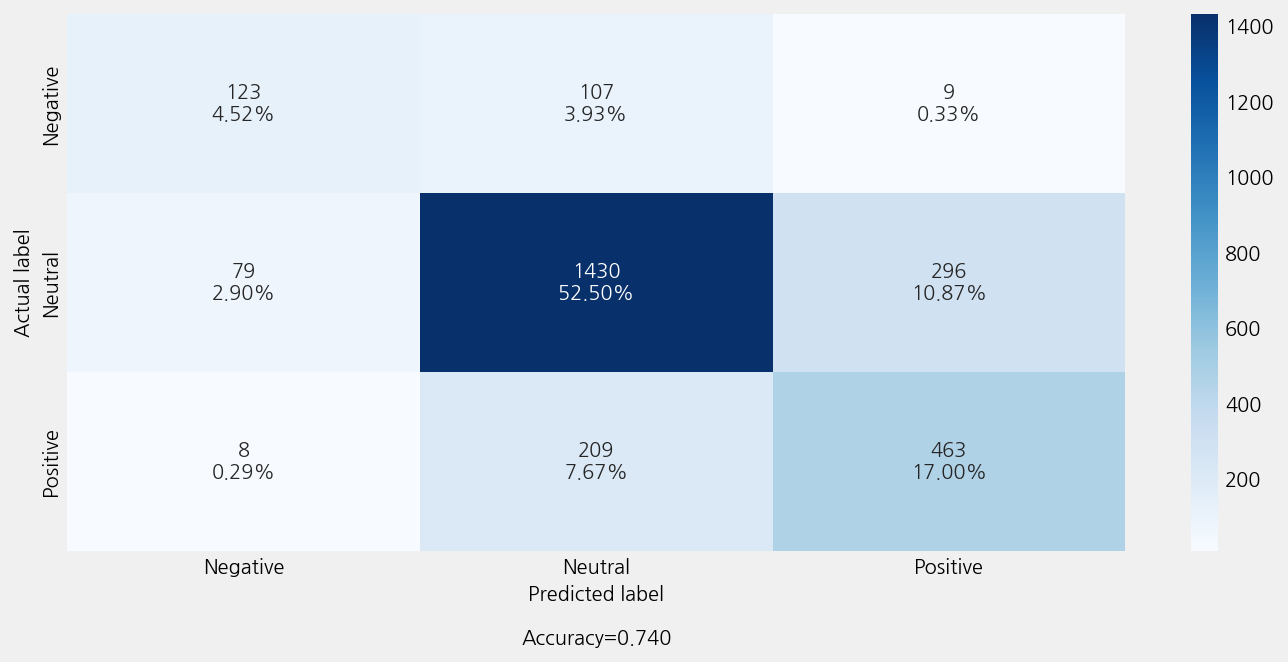

time: 14.3 s (started: 2022-12-16 00:27:09 +00:00)


In [5]:
sm.eval()

## Preparing `esg_topics_improved` dataset

In [9]:
ds_cfg = eKonf.compose("dataset=dataset")
ds_cfg.name = "esg_topics_improved"
ds_cfg.data_dir = "/workspace/data/datasets/simple"
ds = Dataset(**ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

INFO:ekorpkit.info.column:index: index, index of data: index, columns: ['id', 'text', 'labels', 'class', 'example_id', 'count', 'split'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.info.column:Added a column [split] with value [dev]
INFO:ekorpkit.info.column:Added a column [split] with value [test]


['S-기업(공급망)동반성장/상생', 'G-지배구조', 'G-기업윤리/불공정/소송', 'S-소비자', 'E-환경혁신', 'S-사회공헌', 'S-고용', 'E-환경영향', 'E-기후변화', 'S-재해/안전관리']
time: 1.27 s (started: 2022-12-16 00:29:37 +00:00)


## Training a category classficiation model with `esg_topics_improved` dataset

In [10]:
model_cfg = eKonf.compose('task=simple.classification')
model_cfg.name = "esg_topics"
model_cfg.dataset.data_dir = ds.data_dir
model_cfg.dataset.data_files = ds.data_files
model_cfg.model.model_name_or_path = "entelecheia/ekonelectra-base-discriminator"
model_cfg.trainer.num_train_epochs = 2
model_cfg.trainer.max_seq_length = 256
model_cfg.trainer.train_batch_size = 32
model_cfg.trainer.eval_batch_size = 32
# eKonf.print(model_cfg.model.eval)

smt = SimpleClassification(**model_cfg)

time: 2.96 s (started: 2022-12-16 00:30:55 +00:00)


In [11]:
smt.train()

INFO:ekorpkit.datasets.config:Train data: (8953, 7)
INFO:ekorpkit.datasets.config:Test data: (1106, 7)
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
INFO:ekorpkit.models.transformer.simple:Renaming columns: {}
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect 

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for training.
wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 2:   0%|          | 0/280 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_10_2
INFO:simpletransformers.classification.classification_model:{'mcc': 0.6964739632869893, 'acc': 0.7447236180904523, 'eval_loss': 0.8960376670584083}


Running Epoch 1 of 2:   0%|          | 0/280 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_10_2
INFO:simpletransformers.classification.classification_model:{'mcc': 0.7384365010732551, 'acc': 0.7798994974874371, 'eval_loss': 0.7507988410070539}
INFO:simpletransformers.classification.classification_model: Training of electra model complete. Saved to /workspace/projects/ekorpkit-book/exmaples/esg/models/esg_topics-classification.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file /workspace/.cache/cached_dev_electra_256_10_2


Running Evaluation:   0%|          | 0/35 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Initializing WandB run for evaluation.


Training loss,█▅▂▂▅▂▁▄▁▁▁
acc,▁█
eval_loss,█▁
global_step,▁▂▂▃▄▄▄▅▆▆▇██
lr,█▇▇▆▅▅▄▃▂▂▁
mcc,▁█
train_loss,█▁
Training loss,0.71288
acc,0.7799
eval_loss,0.7508
global_step,560


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
INFO:simpletransformers.classification.classification_model:{'mcc': 0.7333948813470017, 'acc': 0.7757685352622061, 'eval_loss': 0.7578847774437496}
INFO:ekorpkit.config:Saving config to /workspace/projects/ekorpkit-book/exmaples/esg/outputs/esg_topics/configs/esg_topics(0)_config.yaml


time: 3min 52s (started: 2022-12-16 00:31:16 +00:00)


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


  0%|          | 0/35 [00:00<?, ?it/s]

INFO:ekorpkit.models.transformer.simple:type of raw_outputs: <class 'numpy.ndarray'>
INFO:ekorpkit.models.transformer.simple:raw_output: [ 1.14953625 -1.18208635 -0.96235901 -0.73341733 -0.74201012  3.33036327
 -0.19258639  0.22086668 -0.6401087  -0.21764491]
INFO:ekorpkit.io.file:Saving dataframe to /workspace/projects/ekorpkit-book/exmaples/esg/outputs/esg_topics/esg_topics(0)_preds.parquet


Accuracy:  0.7757685352622061
Precison:  0.776516477637529
Recall:  0.7757685352622061
F1 Score:  0.7688843831944374
Model Report: 
___________________________________________________
                  precision    recall  f1-score   support

          E-기후변화       0.71      0.65      0.68        63
          E-환경영향       0.53      0.52      0.53        61
          E-환경혁신       0.72      0.73      0.72       102
   G-기업윤리/불공정/소송       0.70      0.57      0.63        91
          G-지배구조       0.85      0.87      0.86       172
            S-고용       0.84      0.87      0.85       156
S-기업(공급망)동반성장/상생       0.92      0.28      0.43        39
          S-사회공헌       0.77      0.84      0.80        68
           S-소비자       0.80      0.88      0.84       317
       S-재해/안전관리       0.72      0.76      0.74        37

        accuracy                           0.78      1106
       macro avg       0.76      0.70      0.71      1106
    weighted avg       0.78      0.78      0.77      1106



INFO:ekorpkit.visualize.base:Saved figure to /workspace/projects/ekorpkit-book/exmaples/esg/outputs/esg_topics/esg_topics(0)_confusion_matrix.png


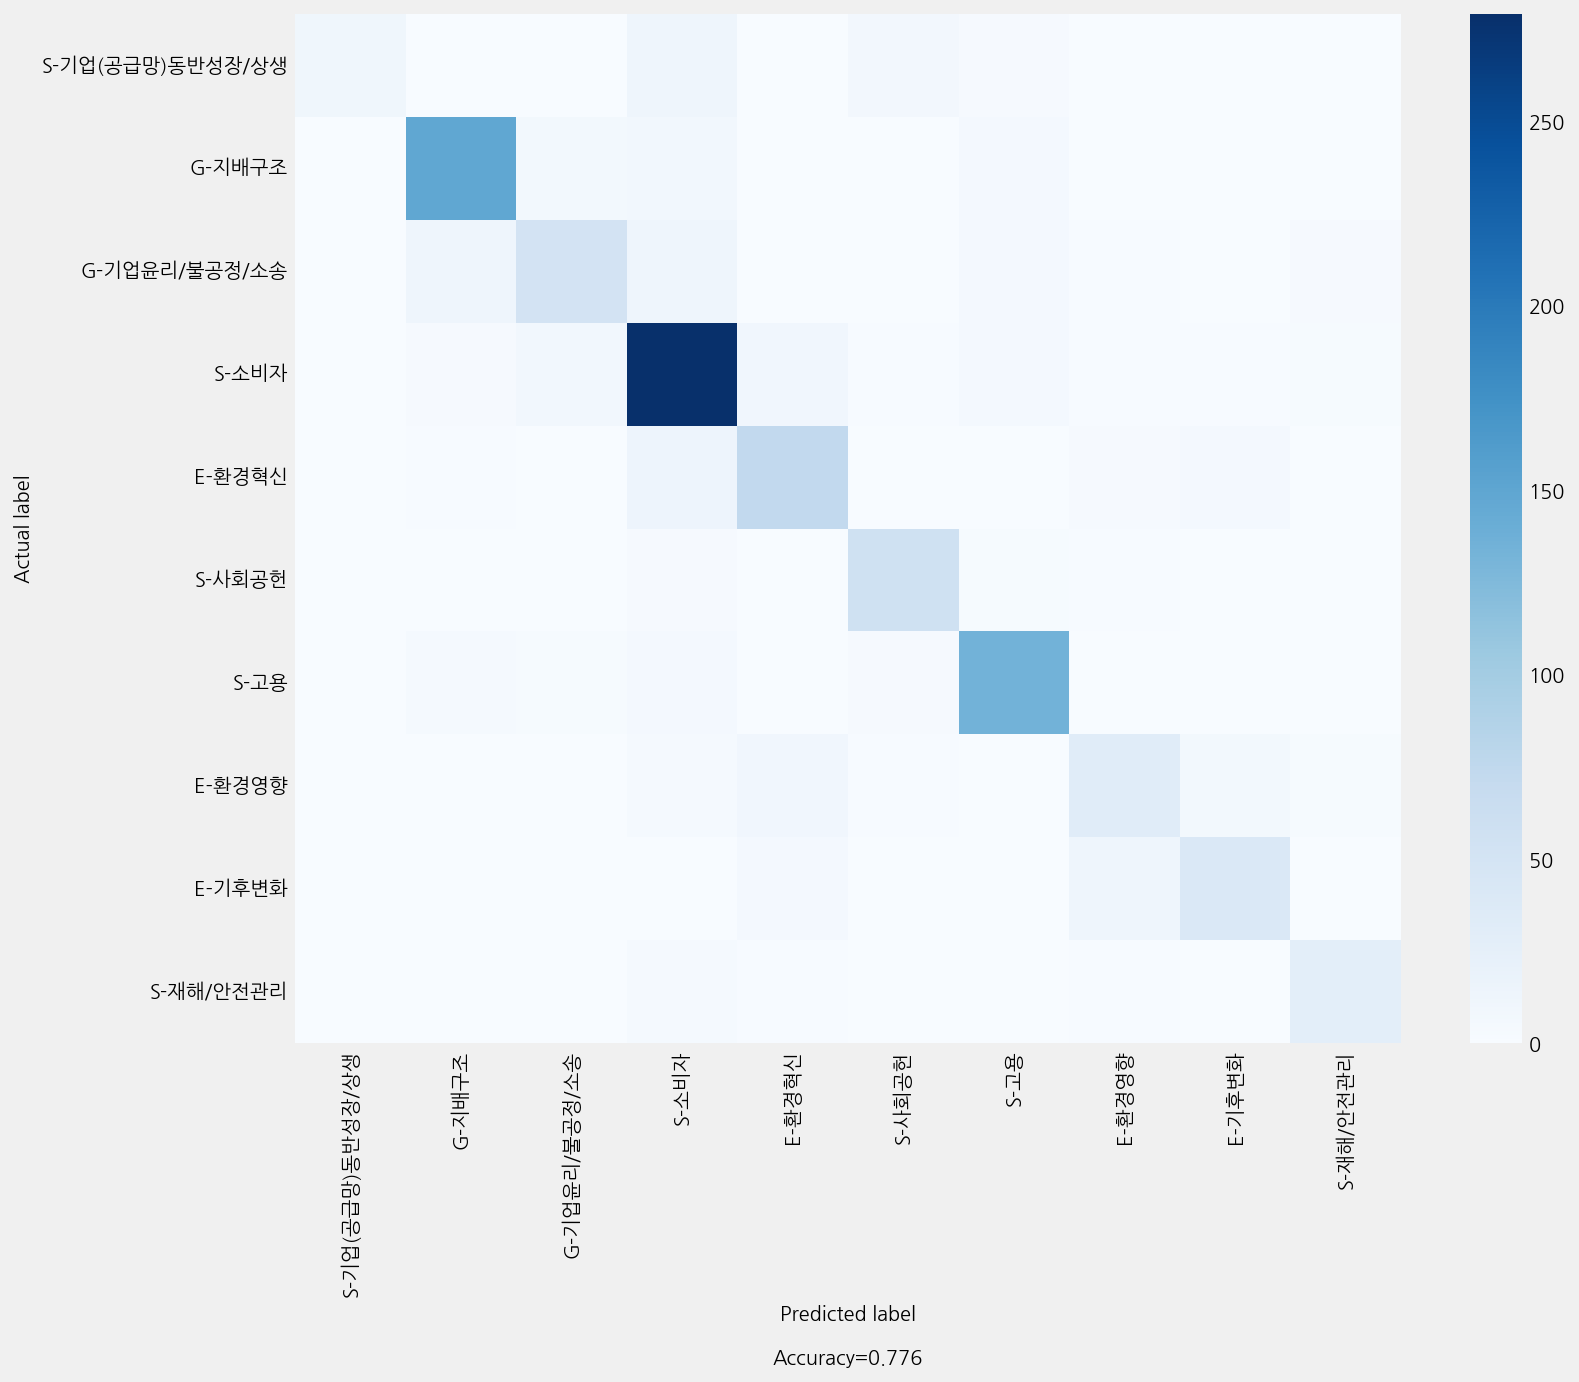

time: 5.48 s (started: 2022-12-16 00:35:08 +00:00)


In [12]:
smt.model.eval.visualize.plot.confusion_matrix.include_values = False
smt.model.eval.visualize.plot.confusion_matrix.include_percentages = False
smt.model.eval.visualize.plot.figure.figsize = (12,10)
smt.eval()